<a href="https://colab.research.google.com/github/shreyakumar05/SparksFoundationTasks/blob/main/Superstore_EDA_Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('SampleSuperstore.csv')

In [ ]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


1) Our target variable here is : profit

2) Description of the data

In [ ]:
df. describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [ ]:
df.shape

(9994, 13)

3) Finding null values

In [ ]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

4) Finding unique values

In [ ]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

5) Dropping country column because it does not affect the target variable

In [ ]:
del df['Country']
df.drop(['Postal Code'], axis = 1, inplace = True)

In [ ]:
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


6) Eliminating duplicates

In [ ]:
duplicates = df.duplicated()
duplicates.sum()

50

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
duplicates = df.duplicated()
duplicates.sum()

0

Hence the duplicates have been removed.

7) Univariate Analysis

Summary statistics : 

In [ ]:
print('Mean is : ',df['Profit'].mean())
print('Median is : ',df['Profit'].median())
print('Standard deviation is : ',df['Profit'].std())


Mean is :  28.65689630778467
Median is :  8.6665
Standard deviation is :  234.2601076909573


Frequency table : 

In [ ]:
df['Profit'].value_counts()

0.0000     65
6.2208     43
9.3312     38
5.4432     32
3.6288     32
           ..
83.2508     1
16.1096     1
7.1988      1
1.6510      1
72.9480     1
Name: Profit, Length: 7287, dtype: int64

We can see that the profit 0.0 occurs 65 times. So it can be concluded that the store does not have much profit.

Creating charts :

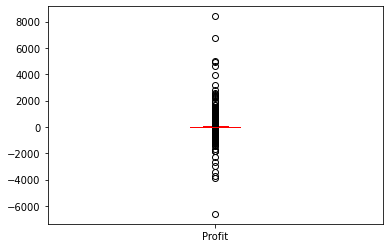

In [ ]:
df.boxplot(column=['Profit'], grid=False, color='red')

We can see that many outliers are present.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f04f7b5e990>]],
      dtype=object)

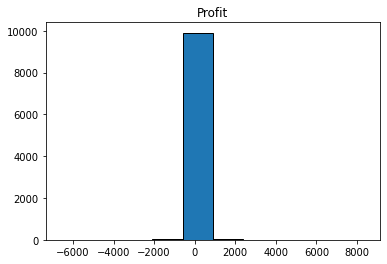

In [ ]:
df.hist(column='Profit', grid=False, edgecolor='black')

Data visualization

In [ ]:
corr = df.corr()

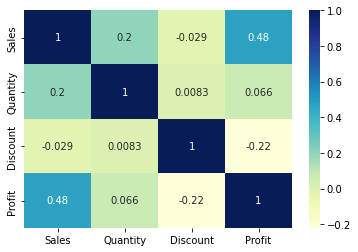

In [ ]:
sns.heatmap(corr, annot = True, cmap="YlGnBu" )

Discount vs Profit

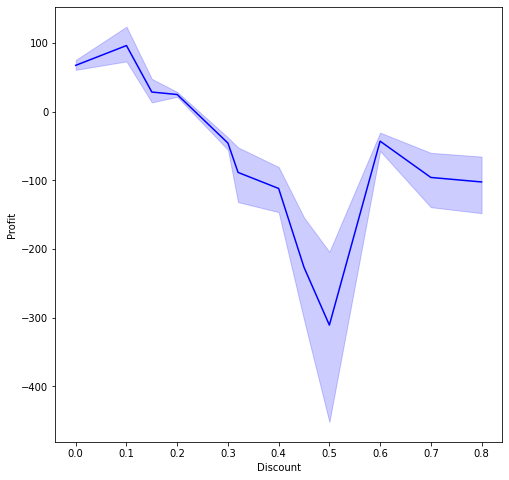

In [ ]:
plt.figure(figsize=(8,8))
sns.lineplot(x='Discount', y='Profit', color='blue', data=df)

Quantity vs Profit

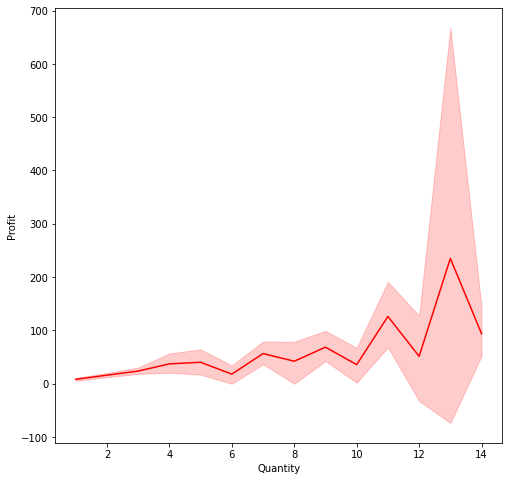

In [ ]:
plt.figure(figsize=(8,8))
sns.lineplot(x='Quantity',y= 'Profit', color='red', data=df)

Sales by state

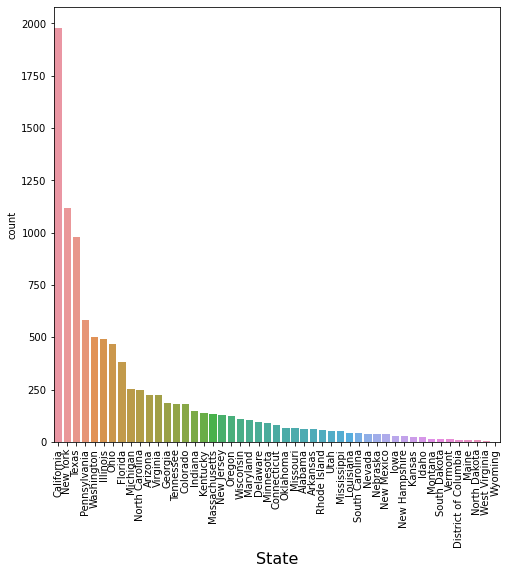

In [ ]:
plt.figure(figsize=(8,8))
chart = sns.countplot(x='State', data=df, order=df['State'].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.set_xlabel("State", fontsize = 16)
plt.show()

Category wise sales 

Text(0.5, 1.0, 'Category wise sales')

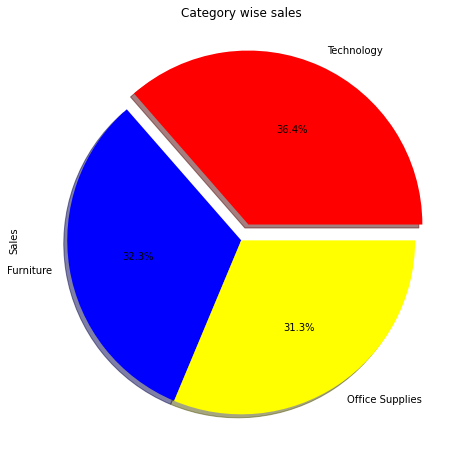

In [ ]:
pie = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,8))
explode=(0.1, 0.0, 0.0)
color = ['red', 'blue', 'yellow']
pie.plot.pie(autopct = "%1.1f%%", explode = explode, colors = color, shadow = True)
plt.title('Category wise sales')

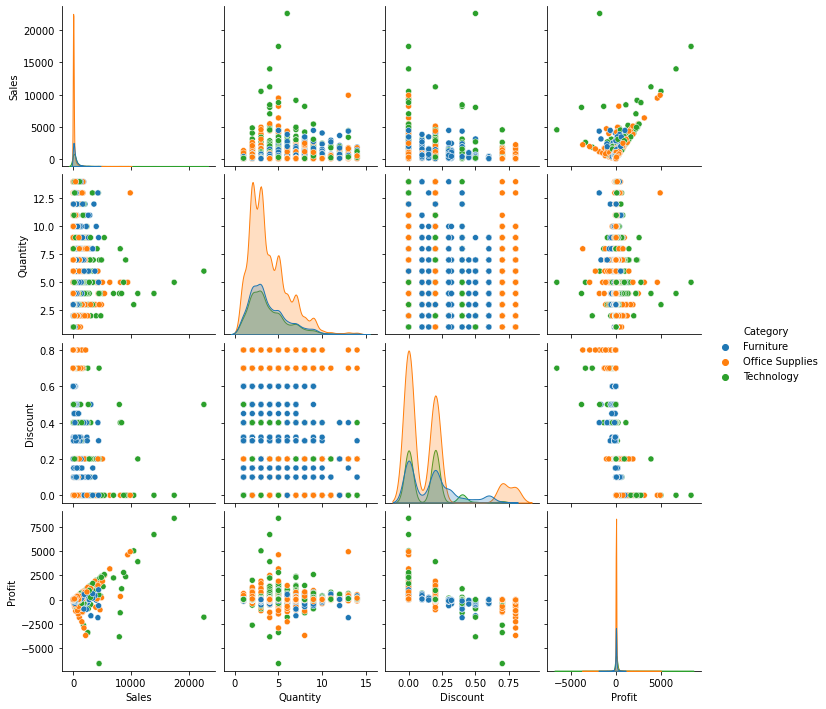

In [ ]:
sns.pairplot(df, hue = 'Category', diag_kind = 'kde')

In [4]:
df_loss = df[df['Profit']<0]
df_profit = df[df['Profit']>0]

Finding profitable ship mode

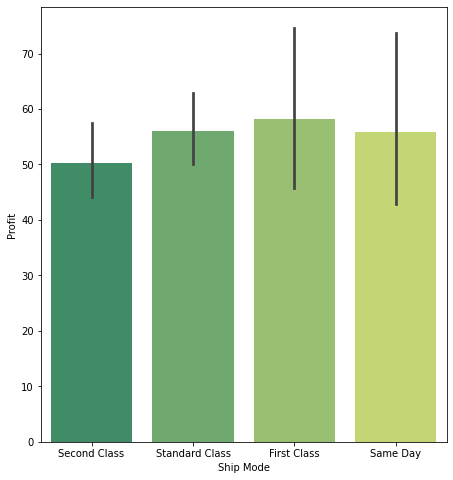

In [ ]:
plt.figure(figsize=(16,8))
axes = plt.subplot(121)
sns.barplot(x = 'Ship Mode', y='Profit', data = df_profit, palette = "summer")

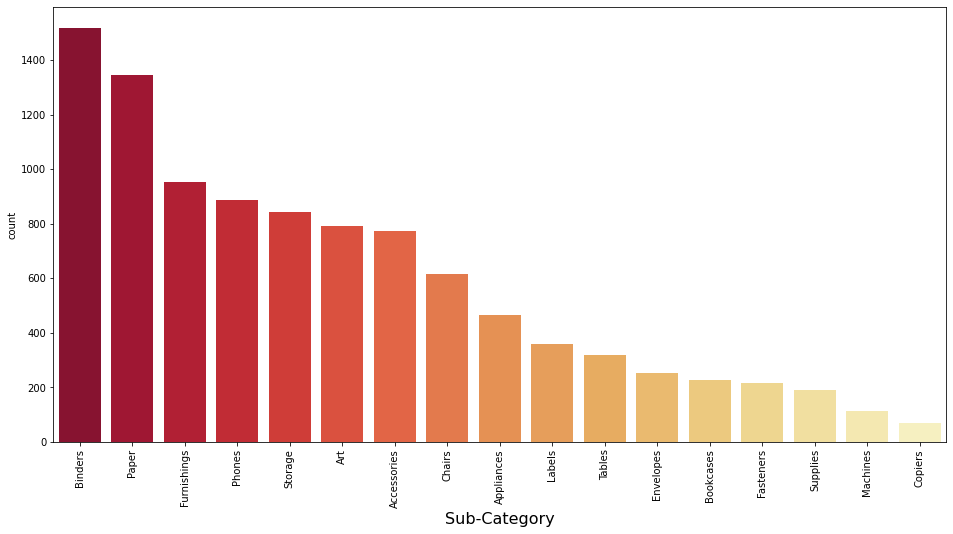

In [ ]:
plt.figure(figsize=(16,8))
sub_ca_count = sns.countplot(x = 'Sub-Category', data = df, order=df['Sub-Category'].value_counts().index, palette = 'YlOrRd_r')

sub_ca_count.set_xticklabels(sub_ca_count.get_xticklabels(), rotation=90)
sub_ca_count.set_xlabel("Sub-Category", fontsize = 16)
plt.show()

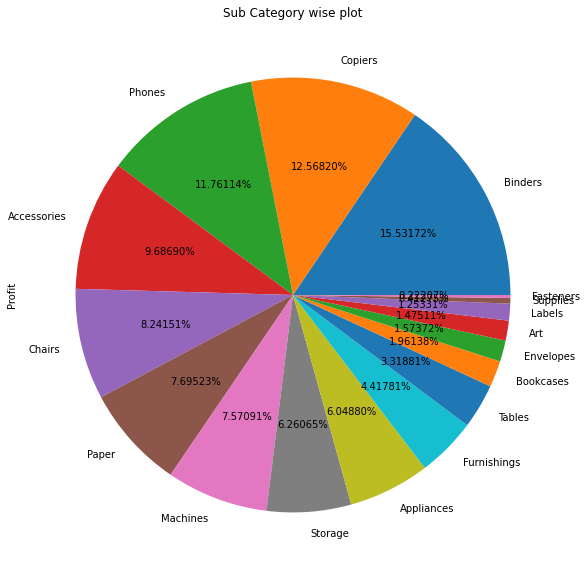

In [5]:
x = df_profit.groupby('Sub-Category')['Profit'].sum().sort_values(ascending = False)

plt.figure(figsize = (10,10))
x.plot.pie(autopct = "%1.5f%%")
plt.title('Sub Category wise plot')
plt.show()

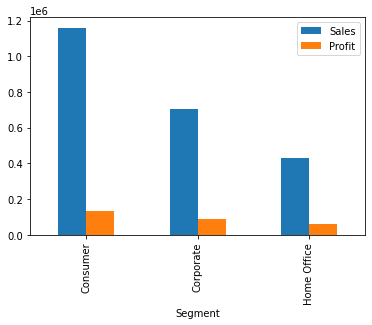

In [ ]:
y = df.groupby('Segment')[['Sales', 'Profit']].sum()
y.plot.bar()
plt.show()

From this EDA, we can conclude that the company is incurring losses which is bad for the company. It is mostly facing losses due to the discounts provided by the company. But these discounts are provided only during some seasons which also benefit inattracting a lot of customers new as well as old. So, it is essential to give discounts at that time. 

So, it can be concluded that the company is incurring losses but attracting customers and building its base from a larger perspective.